In [236]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Set up the game.

Define the rank and suit of a card.

In [237]:
import enum

ranks = {
    "two" : 2,
    "three" : 3,
    "four" : 4,
    "five" : 5,
    "six" : 6,
    "seven" : 7,
    "eight" : 8,
    "nine" : 9,
    "ten" : 10,
    "jack" : 10,
    "queen" : 10,
    "king" : 10,
    "ace" : (1, 11)
}
    
class Suit(enum.Enum):
    spades = "spades"
    clubs = "clubs"
    diamonds = "diamonds"
    hearts = "hearts"

Definir cartas y mazo
Revolver y repartir mazo

In [238]:
class Card:
    def __init__(self, suit, rank, value):
        self.suit = suit
        self.rank = rank
        self.value = value
        
    def __str__(self):
        return self.rank + " of " + self.suit.value

class Deck:
    def __init__(self, num=1):
        self.cards = []
        for i in range(num):
            for suit in Suit:
                for rank, value in ranks.items():
                    self.cards.append(Card(suit, rank, value))
                
    def shuffle(self):
        random.shuffle(self.cards)
        
    def deal(self):
        return self.cards.pop(0)
    
    def peek(self):
        if len(self.cards) > 0:
            return self.cards[0]
        
    def add_to_bottom(self, card):
        self.cards.append(card)
        
    def __str__(self):
        result = ""
        for card in self.cards:
            result += str(card) + "\n"
        return result
    
    def __len__(self):
        return len(self.cards)

# Construir Blackjack

### Definir logica para cartas del dealer


In [239]:

def dealer_eval(player_hand):
    num_ace = 0
    use_one = 0
    for card in player_hand:
        if card.rank == "ace":
            num_ace += 1
            use_one += card.value[0] # 1 para As
        else:
            use_one += card.value
    
    if num_ace > 0:
        # COmpara si el 11 se puede convertir en 1
        # mientras la mano edl dealer se acerca entre [17,21]
        
        # Dealer no puede pedir despues de 17
        
    
        
        ace_counter = 0
        while ace_counter < num_ace:
            #Sumar 10 porque el 1 ya estaba siendo usado
            use_eleven = use_one + 10 
            
            if use_eleven > 21:
                return use_one
            elif use_eleven >= 17 and use_eleven <= 21:
                return use_eleven
            else:
                # Si el As usado como 11 da menos de 17 en la suma
                use_one = use_eleven
            
            ace_counter += 1
        
        return use_one
    else:
        return use_one

### Definir logica del jugador

Se le da prioridad al 11, se cambia a 1 si el jugador se llega a pasar

In [240]:
def player_eval(player_hand):
    num_ace = 0
    # use_one cada As se cuenta como 1
    use_one = 0
    for card in player_hand:
        if card.rank == "ace":
            num_ace += 1
            use_one += card.value[0] 
        else:
            use_one += card.value
    
    if num_ace > 0:
        
        # Que sea 11 mientras no entre en el rango [18,21]
        
        ace_counter = 0
        while ace_counter < num_ace:
            use_eleven = use_one + 10 
            
            if use_eleven > 21:
                return use_one
            elif use_eleven >= 18 and use_eleven <= 21:
                return use_eleven
            else:
                use_one = use_eleven
            
            ace_counter += 1
        
        return use_one
    else:
        return use_one

### Logica turno dealer



In [241]:
def dealer_turn(dealer_hand, deck):
    # Calcula valor de mano del dealer
    dealer_value = dealer_eval(dealer_hand)

    
    # Delaer pide hasta que tenga 17+
    while dealer_value < 17:
        # hit
        dealer_hand.append(deck.deal())
        dealer_value = dealer_eval(dealer_hand)

    return dealer_value, dealer_hand, deck

### Main Blackjack play_game()

Can use higher-order functions functionality to pick which player policy to use.

In [242]:
def play_game(player_policy, num_decks = 2, start_cash = 1000, num_rounds = 100):
    # Este juego consiste en 2 barajas(mazos)
    bj_deck = Deck(num_decks)

    # Solo barajea al inicio de cada juego
    bj_deck.shuffle()
    
    # Mantener registro de recompensa/castigo. 
    player_cash = start_cash
    
    rounds_played = 0
    
    while rounds_played < num_rounds and player_cash > 0:
        # Jugador apuesta 100 cada ronda
        # Gana 100 por cada victoria
        # Pierde 100 por cada derrota
        # Empate no pasa nada (Modificar para que el jugador intente ganar mas que empatar)
        
        player_hand = [bj_deck.deal(), bj_deck.deal()]
        dealer_hand = [bj_deck.deal(), bj_deck.deal()]
        
        
        ## Begin player turn phase.
        
        player_value, player_hand, bj_deck = player_policy(player_hand, bj_deck)
            
        ## Player turn phase over.
        
        #--------------------------------------------------------#
        
        ## Begin automated phase of the Dealer's Play and
        ## determining the winner of the round.
        
        if player_value > 21: # above 21, player loses automatically.
            player_cash -= 100
        elif player_value == 21: # blackjack! Player wins automatically.
            player_cash += 100
        else:
            ## Begin dealer turn phase.
            
            dealer_value, dealer_hand, bj_deck = dealer_turn(dealer_hand, bj_deck)
                
            ## End of dealer turn phase
            
            #------------------------------------------------------------#
            
            ## Final Compare
            
            if dealer_value > 21: # dealer above 21, player wins automatically
                player_cash += 100
            elif dealer_value == 21: # dealer has blackjack, player loses automatically
                player_cash -= 100
            else: # dealer and player have values less than 21.
                if player_value > dealer_value: # player closer to 21, player wins.
                    player_cash += 100
                elif player_value < dealer_value: # dealer closer to 21, dealer wins.
                    player_cash -= 100
                # Nothing happens if a tie.
                
        ## End of round formalities
        
        # Add all cards to the end of deck, and shuffle. 
        # (Shuffling not usually done in casino blackjack.)
        bj_deck.cards += player_hand
        bj_deck.cards += dealer_hand
        bj_deck.shuffle()
            
        rounds_played += 1
        
    # Returns net gains/losses of playing
    return player_cash - start_cash

# Politica discreta


If hand >= 18: Quedarse.  
Else: Pedir.

In [243]:
def discrete_policy(player_hand, deck):
    player_value = player_eval(player_hand)
    
 
    while player_value < 18:
        player_hand.append(deck.deal())
        player_value = player_eval(player_hand)
        
    return player_value, player_hand, deck

# Correr experimento 1

In [244]:
results = {}

num_rds = 1
num_games = 100000

net_avg = 0

for i in range(num_games):
    net_avg += play_game(discrete_policy, num_rounds = num_rds)
net_avg /= num_games

results[num_games] = net_avg

**Grafica de resultados 1**

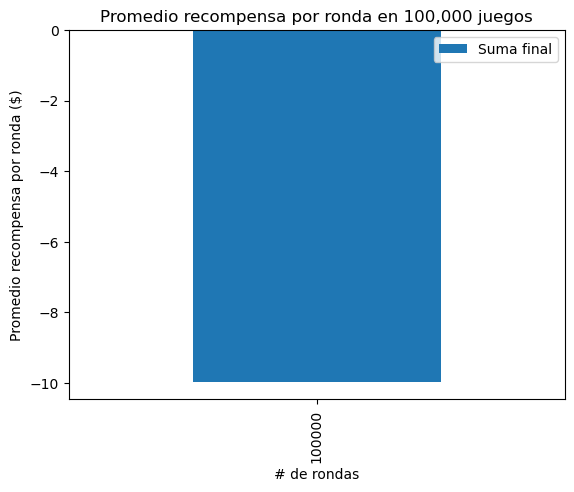

In [245]:

df = pd.DataFrame(list(results.values()), columns = ["Suma final"], index = results.keys())

# alinea x/y
df.sort_index(inplace=True)

df.plot.bar()

plt.xlabel("# de rondas")
plt.ylabel("Promedio recompensa por ronda ($)")
plt.title("Promedio recompensa por ronda en 100,000 juegos")

plt.show()

# Metodo estocastico


If hand >= 18: 80% quedarse, 20% pedir
Else: 80% pedir, 20% player quedarse.

In [246]:
def stochastic_policy(player_hand, deck):
    player_value = player_eval(player_hand)
    
   
    
    stand = False
    while player_value < 18 and stand == False:
        percent = random.randint(1, 10)
        if percent <= 8:
            player_hand.append(deck.deal())
            player_value = player_eval(player_hand)
        else:
            # quedarse
            stand = True
    
    if stand:
        return player_value, player_hand, deck
    
    # si ahora jugador tiene >= 18.
    if player_value < 21:
        percent = random.randint(1, 10)
        if percent > 8:
            # pedir
            player_hand.append(deck.deal())
            player_value = player_eval(player_hand)        
            
        # else: quedarse
    # else: si jugador rebasa 21, quedarse
    
    return player_value, player_hand, deck

## Correr 100,000 juegos con 1 ronda cada uno para promediar recompensa/ perdida 

In [247]:
results = {}

num_rds = 1
num_games = 100000

net_avg = 0

for i in range(num_games):
    net_avg += play_game(stochastic_policy, num_rounds = num_rds)
net_avg /= num_games

results[num_games] = net_avg

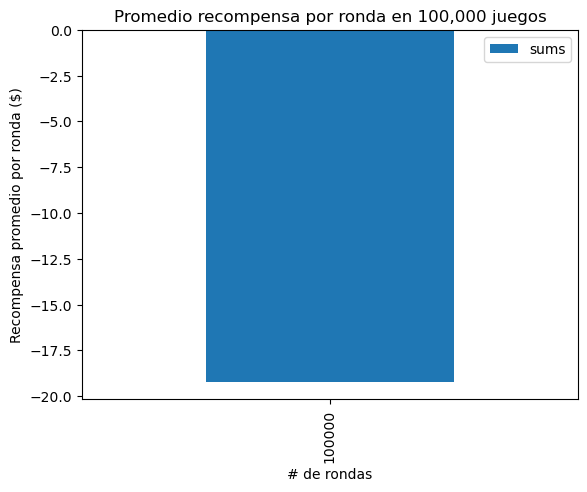

In [248]:

df = pd.DataFrame(list(results.values()), columns = ["sums"], index = results.keys())

df.sort_index(inplace=True)

df.plot.bar()

plt.xlabel("# de rondas")
plt.ylabel("Recompensa promedio por ronda ($)")
plt.title("Promedio recompensa por ronda en 100,000 juegos")

plt.show()

## Discreto vs Estocastico

Poner en blog

## Famosa estrategia basica


[Estrategia basica](http://www.chasingthefrog.com/reelfaces/21basicstrategy.php#:~:text=In%20his%201960s%20book%20Beat,following%20version%20of%20Edward%20O.)

In [249]:
# 0 -> quedarse
# 1 -> pedir
ss_chart = {
    12 : [1,1,0,0,0,1,1,1,1,1],
    13 : [0,0,0,0,0,1,1,1,1,1],
    14 : [0,0,0,0,0,1,1,1,1,1],
    15 : [0,0,0,0,0,1,1,1,1,1],
    16 : [0,0,0,0,0,1,1,1,1,1]
}

def basic_strategy_policy(player_hand, dealer_upcard, deck):
    player_value = player_eval(player_hand)
    
    while player_value < 17:
        if player_value < 12: # pedir siempre que < 12
            # hit
            player_hand.append(deck.deal())
            player_value = player_eval(player_hand)
        else: 
            action = None
            if dealer_upcard.rank == "ace":
                action = ss_chart[player_value][-1]
            else:
                action = ss_chart[player_value][dealer_upcard.value - 2]
                
            if action == 0: # stand
                return player_value, player_hand, deck
            else: 
            #hit
                player_hand.append(deck.deal())
                player_value = player_eval(player_hand)
        
    # quedarse si >= 17 y <= 21.
    return player_value, player_hand, deck

In [250]:
def play_game(player_policy, num_decks = 2, start_cash = 1000, num_rounds = 100):
    bj_deck = Deck(num_decks)

    bj_deck.shuffle()
    
    player_cash = start_cash
    
    rounds_played = 0
    
    while rounds_played < num_rounds and player_cash > 0:
        
        player_hand = [bj_deck.deal(), bj_deck.deal()]
        dealer_hand = [bj_deck.deal(), bj_deck.deal()]
        
        dealer_upcard = dealer_hand[0]
        
        
        player_value, player_hand, bj_deck = player_policy(player_hand, dealer_upcard, bj_deck)
            
        
        if player_value > 21: 
            player_cash -= 100
        elif player_value == 21: 
            player_cash += 100
        else:
            
            dealer_value, dealer_hand, bj_deck = dealer_turn(dealer_hand, bj_deck)
                
            
            
            if dealer_value > 21:
                player_cash += 100
            elif dealer_value == 21: 
                player_cash -= 100
            else: 
                if player_value > dealer_value: 
                    player_cash += 100
                elif player_value < dealer_value: 
                    player_cash -= 100
                # Nada si empatan, irrelevante
                
        bj_deck.cards += player_hand
        bj_deck.cards += dealer_hand
        bj_deck.shuffle()
            
        rounds_played += 1
        
    # Ganancias/perdidas netas
    return player_cash - start_cash

In [251]:
results = {}
num_rds = 1
num_games = 10000

for i in range(num_games):
    net_avg += play_game(basic_strategy_policy, num_rounds = num_rds)
net_avg /= num_games

results[num_games] = net_avg

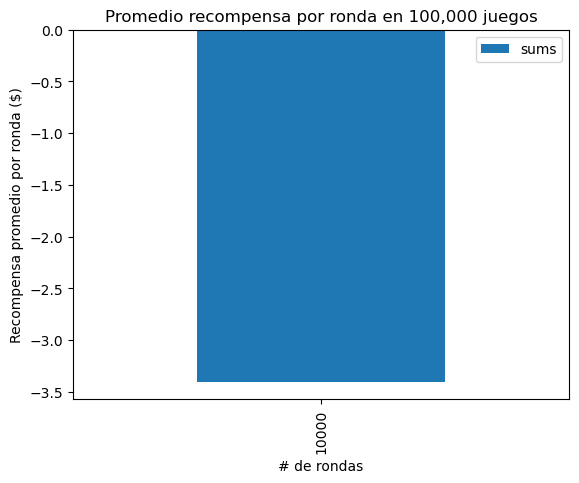

In [252]:

df = pd.DataFrame(list(results.values()), columns = ["sums"], index = results.keys())

df.sort_index(inplace=True)

df.plot.bar()

plt.xlabel("# de rondas")
plt.ylabel("Recompensa promedio por ronda ($)")
plt.title("Promedio recompensa por ronda en 100,000 juegos")

plt.show()

## Definir ambiente OpenAI

In [253]:
import random
import numpy as np
import gym
from gym import error, spaces, utils
from gym.utils import seeding

INITIAL_BALANCE = 1000
NUM_DECKS = 6

class BlackjackEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(BlackjackEnv, self).__init__()
        
        # Inicializa juego
        self.bj_deck = Deck(NUM_DECKS)
        
        self.player_hand = []
        self.dealer_hand = []
        
        self.reward_options = {"lose":-100, "tie":0, "win":100}
        
        # pedir = 0, quedarse = 1
        self.action_space = spaces.Discrete(2)
        
        
        # posibles valores de la carta cerrada del dealer. (2 al 11)
        self.observation_space = spaces.Tuple((spaces.Discrete(18), spaces.Discrete(10)))
        
        self.done = False
        
    def _take_action(self, action):
        if action == 0: # hit
            self.player_hand.append(self.bj_deck.deal())
            
        # recalcular valor de la carta del jugador
        self.player_value = player_eval(self.player_hand)
    
    def step(self, action):
        self._take_action(action)
        
        # terminar episodio si el jugador tiene >= 21.
        self.done = action == 1 or self.player_value >= 21
        
        # recompensa es 0 si jugador pide y sigue abajo de 21
        rewards = 0
        
        if self.done:
            # CALCULAR RECOMPENSA
            if self.player_value > 21:
                rewards = self.reward_options["lose"]
            elif self.player_value == 21: 
                rewards = self.reward_options["win"]
            else:
                ## turno del dealer

                dealer_value, self.dealer_hand, self.bj_deck = dealer_turn(self.dealer_hand, self.bj_deck)

                

                #------------------------------------------------------------#

                ## comparaciones

                if dealer_value > 21: # dealer arriba de 21, gana jugador
                    rewards = self.reward_options["win"]
                elif dealer_value == 21: # dealer  blackjack, jugador pierde
                    rewards = self.reward_options["lose"]
                else: # si los dos tienen menos de 21
                    if self.player_value > dealer_value: #jugador mas cercano a 21
                        rewards = self.reward_options["win"]
                    elif self.player_value < dealer_value: # dealer mas cercano a 21
                        rewards = self.reward_options["lose"]
                    else:
                        rewards = self.reward_options["tie"]
        
        self.balance += rewards
        
        
        # restar para poder ver la observacion de cartas del 1-18
        
        player_value_obs = self.player_value - 2
        
        # carta abierta del dealer.
        # restar para valor real por si hay un as
        upcard_value_obs = dealer_eval([self.dealer_upcard]) - 1
        
        # estado se representa por cartas del jugador + carta abierta del dealer.
        obs = np.array([player_value_obs, upcard_value_obs])
        
        return obs, rewards, self.done, {}
    
    def reset(self): # reinicia juego a estado inicial
        # agrega las cartas del dealer y del jugador a la baraja
        self.bj_deck.cards += self.player_hand + self.dealer_hand

        # barajear al inicio del juego
        self.bj_deck.shuffle()
         
        self.balance = INITIAL_BALANCE
        
        self.done = False
        
        
        # reparte dos cartas al dealer y jugador
        self.player_hand = [self.bj_deck.deal(), self.bj_deck.deal()]
        self.dealer_hand = [self.bj_deck.deal(), self.bj_deck.deal()]
        self.dealer_upcard = self.dealer_hand[0]
        
        # calcula numero del jugador
        self.player_value = player_eval(self.player_hand)
        
    
        player_value_obs = self.player_value - 2
            
        
        upcard_value_obs = dealer_eval([self.dealer_upcard]) - 1
        

        obs = np.array([player_value_obs, upcard_value_obs])
        
        return obs
    
    def render(self, mode='human', close=False):
        #convierte carta en numeros legibles NO PUEDO IMPRIMIR PORQUE SE CRASHEA MI COMPU
        hand_list = []
        for card in self.player_hand:
            hand_list.append(card.rank)
            
        # recalcula carta dealer
        upcard_value = dealer_eval([self.dealer_upcard])
        
        print(f'Balance: {self.balance}')
        print(f'Player Hand: {hand_list}')
        print(f'Player Value: {self.player_value}')
        print(f'Dealer Upcard: {upcard_value}')
        print(f'Done: {self.done}')
        
        print()

## Testear con environment de OpenAI sin Q learning ni parametros o reglas especificados

In [254]:
env = BlackjackEnv()

total_rewards = 0
NUM_EPISODES = 1000

for _ in range(NUM_EPISODES):
    env.reset()
    
    episode_reward = 0
    while env.done == False:
        action = env.action_space.sample()

        new_state, reward, done, desc = env.step(action)
        
        episode_reward += reward
        
    total_rewards += episode_reward
        
avg_reward = total_rewards / NUM_EPISODES
print(avg_reward)

-36.3


# Implementacion de algoritmo monte carlo

In [255]:
import numpy as np
import random

In [256]:
def run_mc(env, num_episodes):
    '''
    observation_space[0]18 valores posibles del jugador (3 al 20)
    observation_space[1] 10 posibles valores del dealer. (2 al 11)

Combinandolos te da todos los estados posibles
    multiplicar con hit/stand te da todas las opciones posibles

   mapa de estados Q
    '''
    Q = np.zeros([env.observation_space[0].n * env.observation_space[1].n, env.action_space.n], dtype=np.float16)


    #  Mapa con todas las posibilidades de distribución
    
    # El 0 representa el hit y el 1 stand, .5 la probabilidad de 50 y 50 de cada uno
    prob = np.zeros([env.observation_space[0].n * env.observation_space[1].n, env.action_space.n], dtype=np.float16) + 0.5

    # learning rate
    alpha = 0.01

    epsilon = 1
    
    
    # permitir que se explore en los primeros intentos y pulir en los ultimos
    decay = 0.9994
    
    # Aunque la caida sea baja es porque es exponencial ya que son miles de intentos
    epsilon_min = 0.9

    gamma = 0.89
    
    for _ in range(num_episodes):
        episode = play_game(env, Q, prob)
        
        epsilon = max(epsilon * decay, epsilon_min)
        
        Q = update_Q(env, episode, Q, alpha, gamma)
        prob = update_prob(env, episode, Q, prob, epsilon)
        
    return Q, prob

In [257]:
def play_game(env, Q, prob):
    # puede contener varios casos de estad->accion->recompensa porque Blackjack no siempre se termina a la primera
    # el jugador nunca pasara de 20 porque solo se usan estados iniciales antes de conseguir estado->accion->recompensa
    episode = []
    
    state = env.reset()
    
    while env.done == False:
        if state[0] == 19: #Jugador tuvo blackjack a la primera, no aprendio
            next_state, reward, env.done, info = env.step(1) 
        else:
            # Buscar en la tabla Q que movimiento hacer
            Q_state_index = get_Q_state_index(state)
            
            # Usar np.argmax() para encontrar la tabla con mayor Q el movimiento por hacer
            best_action = np.argmax(Q[Q_state_index])
            
            # Busca en la tabla el movimiento por hacer
            prob_of_best_action = get_prob_of_best_action(env, state, Q, prob)

            action_to_take = None

            if random.uniform(0,1) < prob_of_best_action: # Toma la mejor accion
                action_to_take = best_action
            else: # toma la contraria
                action_to_take = 1 if best_action == 0 else 0
            
            # Al hacer hit/stand recibe recompensa y avisa si ya acaba el juego o sigue
            next_state, reward, env.done, info = env.step(action_to_take)
            
            # Al ya tener los datos necesarios entra en un episodio
            episode.append((state, action_to_take, reward))
            
            # actualiza la tabla para e proximo estado
            state = next_state
        
    return episode

### funcion update_Q() 

Actualiza estado/accion en Q


In [258]:
def update_Q(env, episode, Q, alpha, gamma):
    '''
    
    Usar error acumulativo para poder tener mejores decisiones.
      bajando gamma reduce el impacto de las decisiones en la recompensa
    Esto hará que jugador considere las 
    recompensas futuras y no solo mire cada estado de manera aislada a pesar 
    de haber pedido carta anteriormente.

    '''
    step = 0
    for state, action, reward in episode:
        # calcula error acumulativo sin usar el de estados anteriores
        total_reward = 0
        gamma_exp = 0
        for curr_step in range(step, len(episode)):
            curr_reward = episode[curr_step][2]
            total_reward += (gamma ** gamma_exp) * curr_reward
            gamma_exp += 1
        
        # Actualiza Q
        Q_state_index = get_Q_state_index(state)
        curr_Q_value = Q[Q_state_index][action]
        Q[Q_state_index][action] = curr_Q_value + alpha * (total_reward - curr_Q_value)
        
        # Actualiza al sig estado
        step += 1
        
        
    return Q

### funcion update_prob() 

In [259]:
def update_prob(env, episode, Q, prob, epsilon):
    for state, action, reward in episode:
        # Actualiza probabilidades de acciones para el estado actual para actualizar Q y tener mejor decision de accion
        # epsilon va mejorando la posibilidad de elegir mejor accion
        prob = update_prob_of_best_action(env, state, Q, prob, epsilon)
        
    return prob

### Mapear el estado del juego a las tablas de Q y probabilidad

In [260]:
# Dependiendo el estado (carta jugador+carta dealer) busca en la tabla Q

def get_Q_state_index(state):
    # para acomodar que el array empiece a buscar en 0
    initial_player_value = state[0] - 1
 
    dealer_upcard = state[1] - 1

    return (env.observation_space[1].n * (initial_player_value)) + (dealer_upcard)

### Buscar y encontrar la mejor probabilidad

In [261]:
def get_prob_of_best_action(env, state, Q, prob):

    Q_state_index = get_Q_state_index(state)
    
    # np.argmax para encontrar la mejor proba
    best_action = np.argmax(Q[Q_state_index])
    
    # guarda la mejor probabilidad para cada estado/accion
    return prob[Q_state_index][best_action]
    
def update_prob_of_best_action(env, state, Q, prob, epsilon):

    Q_state_index = get_Q_state_index(state)
    
    best_action = np.argmax(Q[Q_state_index])
    
    # epsilon usa la mejor proba
    # empieza en 1 y va reduciendose muuuy lentamente
    # La ecuacion de abajo hace movimientos mas arriesgados y puede dar o mejor recompensa o peor dependiendo la probabilidad
    #prob[Q_state_index][best_action] = prob[Q_state_index][best_action] + ((1 - epsilon) * (1 - prob[Q_state_index][best_action]))
    prob[Q_state_index][best_action] = min(1, prob[Q_state_index][best_action] + 1 - epsilon)
    
    other_action = 1 if best_action == 0 else 0
    prob[Q_state_index][other_action] = 1 - prob[Q_state_index][best_action]
    
    return prob

## Corre Montecarlo completo

In [262]:
import time
env = BlackjackEnv()

start_time = time.time()
new_Q, new_prob = run_mc(env, 1000000)
end_time = time.time()

print("Tiempo total de entrenamiento: " + str(end_time - start_time))

Tiempo total de entrenamiento: 113.194176197052


In [263]:
def best_policy(Q):
    #0 y 1 es representacion binaria de pedir y quedarse, colors rojo es quedarse y verde pedir, string es H de pedir o S de quedarse
    best_policy_binary = []
    best_policy_string = []
    best_policy_colors = []
    for i in range(len(Q)):
       
        best_policy_binary.append(np.argmax(Q[i]))
        best_policy_string.append("H" if np.argmax(Q[i]) == 0 else "S")
        best_policy_colors.append("g" if np.argmax(Q[i]) == 0 else "r")
        
    return best_policy_binary, best_policy_string, best_policy_colors

## Dataframe para guardar datos en forma de tabla para Q

In [264]:
import pandas as pd
new_Q_binary, new_Q_string, new_Q_colors = best_policy(new_Q)

df = pd.DataFrame(columns = range(2, 12))

color_df = pd.DataFrame(columns = range(2, 12))

for s in range(3, 21): # valores posibles de 3 al 20
    start = env.observation_space[1].n * (s-3)
    end = start + 10
    df.loc[s]=(new_Q_string[start:end])
    color_df.loc[s]=(new_Q_colors[start:end])

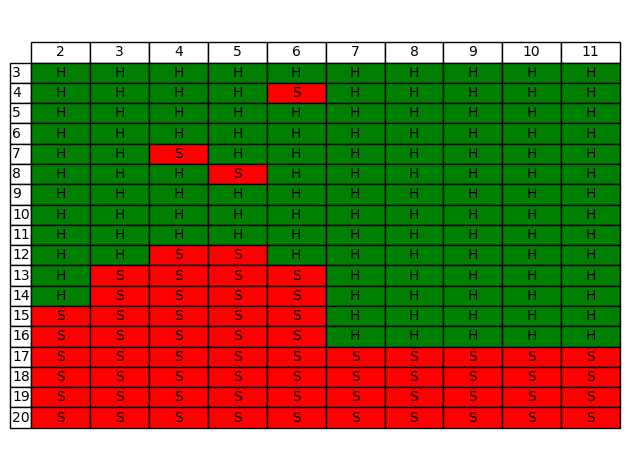

In [265]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.set_axis_off()
ax.axis('tight')

ax.table(cellText=df.values, cellColours=color_df.values, cellLoc="center", rowLabels=df.index, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()

## Testear nuevos episodios con el aprendizaje obtenido

In [268]:
import random
env = BlackjackEnv()

total_rewards = 0
NUM_EPISODES = 100000

for _ in range(NUM_EPISODES):
    state = env.reset()

    while env.done == False:
        if state[0] == 19: 
            next_state, reward, env.done, info = env.step(1)
            total_rewards += reward
        else:
            Q_index = get_Q_state_index(state)
            action = new_Q_binary[Q_index]

            new_state, reward, done, desc = env.step(action)
            state = new_state
            total_rewards += reward
        
avg_reward = total_rewards / NUM_EPISODES
print(avg_reward)

-4.514
